In [44]:
'''
This script reads in the simulated data made by
Alex and solves for V. Currently it is unable to
both with just the causal SNPs and the entire
set of SNPs.
'''
import sib_ldsc_z as ld
import numpy as np
import h5py
import glob
import time
import matplotlib.pyplot as plt

startTime = time.time()
print("Start time: ", startTime)

# files = glob.glob('/disk/genetics/ukb/alextisyoung/vcinf/1/causal.hdf5')
# files = glob.glob("/disk/genetics/ukb/alextisyoung/vcinf/1/chr_*.hdf5")
files = glob.glob("C:/Users/Hariharan/Documents/genoecon_work/snipardata/causal.hdf5")
print("Reading files...")

# read in first file
file = files[0]
print("Reading file: ", file)
hf = h5py.File(file, 'r')
theta  = hf.get('estimate')[()]
S = hf.get('estimate_covariance')[()]
f = hf.get('freqs')[()]

if len(files) > 1:
    for file in files[1:]:
        print("Reading file: ", file)
        hf = h5py.File(file, 'r')
        theta_file  = hf.get('estimate')[()] 
        S_file = hf.get('estimate_covariance')[()]
        f_file = hf.get('freqs')[()]

        theta = np.append(theta, theta_file, axis = 0)
        S = np.append(S, S_file, axis = 0)
        f = np.append(f, f_file, axis = 0)
  

N = theta.shape[0]

print("S matrix:", S)
print("Theta Matrix: ", theta)
print("Initiating Model...")

# == Keeping only direct effects == #
# S = S[:,0 ,0].reshape((S.shape[0], 1, 1))
# theta = theta[:, 0].reshape((theta.shape[0], 1))


# == amplifying direct effects == #
# Sdir = np.empty(len(S))
# for i in range(len(S)):
#   Sdir[i] = np.array([[1.0, 0.5, 0.5]]) @ S[i] @ np.array([[1.0, 0.5, 0.5]]).T

# S = Sdir.reshape((len(S), 1, 1))
# theta = theta @ np.array([1.0, 0.5, 0.5])
# theta = theta.reshape((theta.shape[0], 1))

# == Combining indirect effects to make V a 2x2 matrix == #
tmatrix = np.array([[1.0, 0.0],
                    [0.0, 0.5],
                    [0.0, 0.5]])
Sdir = np.empty((len(S), 2, 2))
for i in range(len(S)):
    Sdir[i] = tmatrix.T @ S[i] @ tmatrix

S = Sdir.reshape((len(S), 2, 2))
theta = theta @ tmatrix
theta = theta.reshape((theta.shape[0], 2))


# calcualting z
z = np.empty_like(theta)
z[:] = np.nan
for i in range(z.shape[0]):
    z[i, :] = ld.calc_inv_root(S[i]) @ theta[i, :].T
    
print("Z: ", z)

model = ld.sibreg(S = S, z = z, f = f) 

print("Solving Model...")


output_matrix, result = model.solve() # , gradfunc = model._num_grad_V

print("===================================")
print("Output matrix: ", output_matrix)
print("Solver Output: ", result)

executionTime = (time.time() - startTime)
print('Execution time: ' + f'{executionTime:.2f}', " seconds")



Start time:  1601895303.2307029
Reading files...
Reading file:  C:/Users/Hariharan/Documents/genoecon_work/snipardata/causal.hdf5
S matrix: [[[ 2.49708974e-04 -1.78184186e-04 -1.28097367e-04]
  [-1.78184186e-04  9.47441498e-04 -5.13250765e-04]
  [-1.28097367e-04 -5.13250765e-04  8.28836346e-04]]

 [[ 3.28004273e-04 -2.32643710e-04 -1.72544300e-04]
  [-2.32643710e-04  1.22006156e-03 -6.53659808e-04]
  [-1.72544300e-04 -6.53659808e-04  1.07297208e-03]]

 [[ 5.27196098e-04 -3.77260410e-04 -2.80475797e-04]
  [-3.77260410e-04  1.98145583e-03 -1.07192912e-03]
  [-2.80475797e-04 -1.07192912e-03  1.77837047e-03]]

 ...

 [[ 6.16542675e-05  1.31975798e-06 -1.13049909e-05]
  [ 1.31975798e-06  5.47293923e-04 -1.85105309e-04]
  [-1.13049909e-05 -1.85105309e-04  3.47601832e-04]]

 [[ 2.30412261e-04  1.88402828e-05 -4.37237904e-05]
  [ 1.88402828e-05  1.63058180e-03 -1.14203047e-03]
  [-4.37237904e-05 -1.14203047e-03  1.44876423e-03]]

 [[ 2.96793558e-04  2.50526136e-05 -9.40222435e-06]
  [ 2.505261

C:\Users\Hariharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in matmul
C:\Users\Hariharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in matmul


Z:  [[ 1.58905006  1.5458905 ]
 [ 0.45705069 -1.49292811]
 [ 1.80220521  1.93359001]
 ...
 [ 0.07430999  0.64350948]
 [-1.23170419 -1.48659388]
 [-0.24420748  2.91312744]]
No value for U given. Generating a vector of ones (all SNPs weighted equally)
No value for r given. Generating a vector of ones for r
Solving Model...
No initial guess provided.
Making 'optimal' matrix
-39662.74139560478, [[1.e-06 0.e+00]
 [0.e+00 1.e-06]]
-38028.56768861059, [[0.15507687 0.0593122 ]
 [0.0593122  0.98612145]]
-37958.25745468373, [[0.16657598 0.05738474]
 [0.05738474 0.96690674]]
-37706.77294659764, [[0.21257246 0.04967489]
 [0.04967489 0.89004791]]
-35801.30680241998, [[ 0.48321578 -0.01710355]
 [-0.01710355  0.13801313]]
-35738.84736958347, [[0.36513869 0.01783246]
 [0.01783246 0.22925544]]
-35894.495105212205, [[0.13604184 0.08001711]
 [0.08001711 0.14965218]]
-35600.09769550102, [[0.26665584 0.04456404]
 [0.04456404 0.19503604]]
-35548.49152105835, [[ 0.24595975 -0.00111578]
 [-0.00111578  0.11968

In [45]:
output_matrix

array([[0.25451481, 0.01101949],
       [0.01101949, 0.14432562]])

In [46]:
# testing gradient around answer
v1_array = np.linspace(0.23, 0.27, 100)
v2_array = np.linspace(0.142, 0.146, 100)

In [47]:
gradient_array = np.empty((100, 2, 2))

In [48]:
model.neg_logll_grad(ld.extract_upper_triangle(output_matrix_test))

-35527.48576965838, [[0.25451481 0.02      ]
 [0.02       0.14432562]]


(35527.48576965838, array([ 18.46641016, 264.38687513,  -9.19955743]))

In [49]:
for i, v1 in enumerate(v1_array):
    output_matrix_test = np.copy(output_matrix)
    output_matrix_test[0, 0] = v1
    
    gradient = model.neg_logll_grad(ld.extract_upper_triangle(output_matrix_test))[1]
    gradient_array[i, :, :] = ld.return_to_symmetric(gradient, 2)

-35530.56261578012, [[0.23       0.01101949]
 [0.01101949 0.14432562]]
-35530.378732170415, [[0.23040404 0.01101949]
 [0.01101949 0.14432562]]
-35530.19819104022, [[0.23080808 0.01101949]
 [0.01101949 0.14432562]]
-35530.02098212206, [[0.23121212 0.01101949]
 [0.01101949 0.14432562]]
-35529.847095184035, [[0.23161616 0.01101949]
 [0.01101949 0.14432562]]
-35529.676520031084, [[0.2320202  0.01101949]
 [0.01101949 0.14432562]]
-35529.50924650236, [[0.23242424 0.01101949]
 [0.01101949 0.14432562]]
-35529.34526447466, [[0.23282828 0.01101949]
 [0.01101949 0.14432562]]
-35529.18456385853, [[0.23323232 0.01101949]
 [0.01101949 0.14432562]]
-35529.027134600845, [[0.23363636 0.01101949]
 [0.01101949 0.14432562]]
-35528.872966682975, [[0.2340404  0.01101949]
 [0.01101949 0.14432562]]
-35528.722050121774, [[0.23444444 0.01101949]
 [0.01101949 0.14432562]]
-35528.57437496901, [[0.23484848 0.01101949]
 [0.01101949 0.14432562]]
-35528.42993131073, [[0.23525253 0.01101949]
 [0.01101949 0.14432562]]


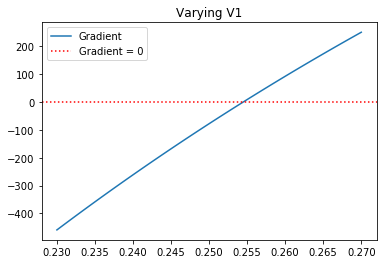

In [50]:
fig, ax = plt.subplots()
ax.plot(v1_array, gradient_array[:, 0, 0], label = "Gradient")
ax.axhline(y=0, color = "red", linestyle = ":", label = "Gradient = 0")
ax.set_title("Varying V1")
ax.legend()
plt.savefig("varying_v1.png")

In [51]:
for i, v2 in enumerate(v2_array):
    output_matrix_test = np.copy(output_matrix)
    output_matrix_test[1, 1] = v2
    
    gradient = model.neg_logll_grad(ld.extract_upper_triangle(output_matrix_test))[1]
    gradient_array[i, :, :] = ld.return_to_symmetric(gradient, 2)

-35525.237182785924, [[0.25451481 0.01101949]
 [0.01101949 0.142     ]]
-35525.2327930657, [[0.25451481 0.01101949]
 [0.01101949 0.1420404 ]]
-35525.228481766586, [[0.25451481 0.01101949]
 [0.01101949 0.14208081]]
-35525.22424883931, [[0.25451481 0.01101949]
 [0.01101949 0.14212121]]
-35525.22009423477, [[0.25451481 0.01101949]
 [0.01101949 0.14216162]]
-35525.21601790292, [[0.25451481 0.01101949]
 [0.01101949 0.14220202]]
-35525.21201979546, [[0.25451481 0.01101949]
 [0.01101949 0.14224242]]
-35525.208099862844, [[0.25451481 0.01101949]
 [0.01101949 0.14228283]]
-35525.20425805555, [[0.25451481 0.01101949]
 [0.01101949 0.14232323]]
-35525.200494324934, [[0.25451481 0.01101949]
 [0.01101949 0.14236364]]
-35525.19680862128, [[0.25451481 0.01101949]
 [0.01101949 0.14240404]]
-35525.19320089612, [[0.25451481 0.01101949]
 [0.01101949 0.14244444]]
-35525.18967110036, [[0.25451481 0.01101949]
 [0.01101949 0.14248485]]
-35525.18621918463, [[0.25451481 0.01101949]
 [0.01101949 0.14252525]]
-35

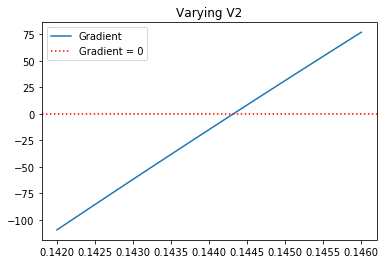

In [52]:
fig, ax = plt.subplots()
ax.plot(v2_array, gradient_array[:, 1, 1], label = "Gradient")
ax.axhline(y=0, color = "red", linestyle = ":", label = "Gradient = 0")
ax.set_title("Varying V2")
ax.legend()
plt.savefig("varying_v2.png")

In [53]:
v12_array = np.linspace(0, 0.02, 100)
for i, v12 in enumerate(v12_array):
    output_matrix_test = np.copy(output_matrix)
    output_matrix_test[0, 1] = v12
    
    gradient = model.neg_logll_grad(ld.extract_upper_triangle(output_matrix_test))[1]
    gradient_array[i, :, :] = ld.return_to_symmetric(gradient, 2)

-35528.71107654525, [[0.25451481 0.        ]
 [0.         0.14432562]]
-35528.57991245593, [[2.54514814e-01 2.02020202e-04]
 [2.02020202e-04 1.44325619e-01]]
-35528.45119886914, [[0.25451481 0.00040404]
 [0.00040404 0.14432562]]
-35528.32493465531, [[0.25451481 0.00060606]
 [0.00060606 0.14432562]]
-35528.20111869717, [[0.25451481 0.00080808]
 [0.00080808 0.14432562]]
-35528.07974989205, [[0.25451481 0.0010101 ]
 [0.0010101  0.14432562]]
-35527.96082714964, [[0.25451481 0.00121212]
 [0.00121212 0.14432562]]
-35527.84434939359, [[0.25451481 0.00141414]
 [0.00141414 0.14432562]]
-35527.730315560715, [[0.25451481 0.00161616]
 [0.00161616 0.14432562]]
-35527.61872460095, [[0.25451481 0.00181818]
 [0.00181818 0.14432562]]
-35527.50957547787, [[0.25451481 0.0020202 ]
 [0.0020202  0.14432562]]
-35527.402867168246, [[0.25451481 0.00222222]
 [0.00222222 0.14432562]]
-35527.298598662455, [[0.25451481 0.00242424]
 [0.00242424 0.14432562]]
-35527.19676896298, [[0.25451481 0.00262626]
 [0.00262626 

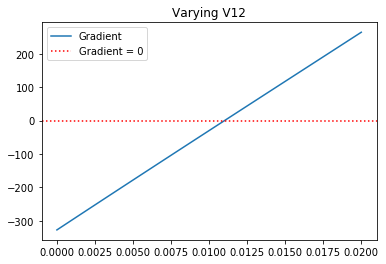

In [54]:
fig, ax = plt.subplots()
ax.plot(v12_array, gradient_array[:, 0, 1], label = "Gradient")
ax.axhline(y=0, color = "red", linestyle = ":", label = "Gradient = 0")
ax.set_title("Varying V12")
ax.legend()
plt.savefig("varying_v12.png")

In [55]:
v12_array.shape

(100,)